In [1]:
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

In [2]:
# Routes
test_dir = '../data/raw/test'
raw_train_dir = '../data/raw/train'
processed_train_dir = '../data/processed/train'

<h4>Construcción del modelo</h4>

In [3]:
model = Sequential()
model.add(Input(shape=(200, 200, 3)))

# Layer 1 - 64 filters
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 2 - 128 filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 3 - 256 filters
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4 - 512 filters
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 5 - 512 filters
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten and dense layers for classification
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
trdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [6]:
tsdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


<h4>Entrenamiento del modelo</h4>

In [ ]:
history = model.fit(
    trdata,
    steps_per_epoch=trdata.samples // trdata.batch_size,
    epochs=10,
    validation_data=tsdata,
    validation_steps=tsdata.samples // tsdata.batch_size
)

In [ ]:
model.save('../models/trained-model.keras')

<h4>Datos del entrenamiento</h4>
Duración total: 15h32m

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [8]:
modelFitData = {
    'epoch1': {'accuracy': 0.4974, 'loss': 0.7154, 'val_accuracy': 0.4996, 'val_loss': 0.6932},
    'epoch2': {'accuracy': 0.4994, 'loss': 0.6932, 'val_accuracy': 0.5000, 'val_loss': 0.6932},
    'epoch3': {'accuracy': 0.4975, 'loss': 0.6932, 'val_accuracy': 0.5000, 'val_loss': 0.6932},
    'epoch4': {'accuracy': 0.5002, 'loss': 0.6932, 'val_accuracy': 0.4998, 'val_loss': 0.6932},
    'epoch5': {'accuracy': 0.5058, 'loss': 0.6931, 'val_accuracy': 0.5000, 'val_loss': 0.6932},
    'epoch6': {'accuracy': 0.4990, 'loss': 0.6932, 'val_accuracy': 0.5000, 'val_loss': 0.6932},
    'epoch7': {'accuracy': 0.5013, 'loss': 0.6932, 'val_accuracy': 0.4998, 'val_loss': 0.6932},
    'epoch8': {'accuracy': 0.5033, 'loss': 0.6932, 'val_accuracy': 0.5006, 'val_loss': 0.6931},
    'epoch9': {'accuracy': 0.4949, 'loss': 0.6932, 'val_accuracy': 0.5004, 'val_loss': 0.6931},
    'epoch10': {'accuracy': 0.5019, 'loss': 0.6931, 'val_accuracy': 0.4998, 'val_loss': 0.6932},
}

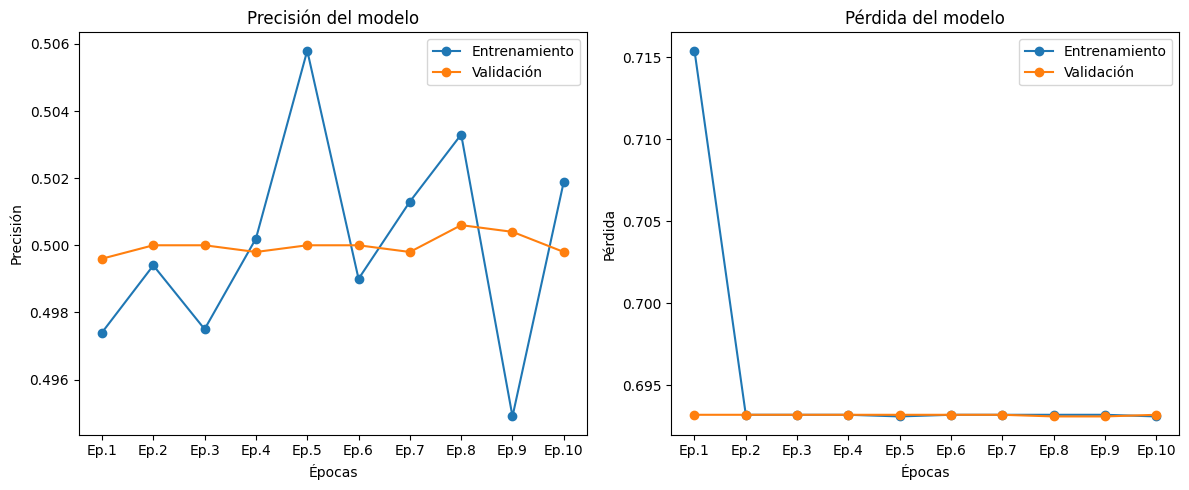

In [9]:
epochs = list(modelFitData.keys())
accuracy = [modelFitData[epoch]['accuracy'] for epoch in epochs]
val_accuracy = [modelFitData[epoch]['val_accuracy'] for epoch in epochs]
loss = [modelFitData[epoch]['loss'] for epoch in epochs]
val_loss = [modelFitData[epoch]['val_loss'] for epoch in epochs]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Entrenamiento', marker='o')
plt.plot(val_accuracy, label='Validación', marker='o')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.xticks(range(len(epochs)), [f"Ep.{i+1}" for i in range(len(epochs))])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Entrenamiento', marker='o')
plt.plot(val_loss, label='Validación', marker='o')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.xticks(range(len(epochs)), [f"Ep.{i+1}" for i in range(len(epochs))])
plt.legend()

plt.tight_layout()
plt.show()